In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Cargar el csv
file_path = 'cars_input.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente
0,CLIN1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,3239,0,2,18
1,CLIN2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,NO,NO,Medio-Bajo,SI,No,NO,1541,7187,2,53
2,CLIN3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO,NO,Medio,NO DATA,No,NO,1541,0,4,21
3,CLIN4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO,SI,Alto,NO DATA,No,NO,2036,0,3,21
4,CLIN5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,NO,NO,Medio,SI,Averia leve,NO,2257,11293,2,56


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23230 entries, 0 to 23229
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODE             23230 non-null  object
 1   PRODUCTO         23230 non-null  object
 2   TIPO_CARROCERIA  23230 non-null  object
 3   COMBUSTIBLE      23230 non-null  object
 4   Potencia_        23230 non-null  object
 5   TRANS            23230 non-null  object
 6   FORMA_PAGO       23230 non-null  object
 7   ESTADO_CIVIL     22890 non-null  object
 8   GENERO           22903 non-null  object
 9   OcupaciOn        23230 non-null  object
 10  PROVINCIA        23230 non-null  object
 11  Campanna1        23230 non-null  object
 12  Campanna2        23230 non-null  object
 13  Campanna3        23230 non-null  object
 14  Zona _Renta      17925 non-null  object
 15  REV_Garantia     23230 non-null  object
 16  Averia_grave     23229 non-null  object
 17  QUEJA_CAC        23230 non-null

In [32]:
# Paso 1 : Seleccionar las columnas categóricas
categorical_columns = [
    'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia_', 'TRANS', 'FORMA_PAGO',
    'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 'Campanna2', 
    'Campanna3', 'Zona _Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC'
]

In [33]:
# Paso 2: 

# Paso 3: Aplicar OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_columns])

# Crear un DataFrame con los resultados del encoding
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combinar los datos originales con los codificados
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)




In [34]:
#  Mostrar el resultado
#  import ace_tools as tools; tools.display_dataframe_to_user(name="Datos Codificados", dataframe=df_encoded)

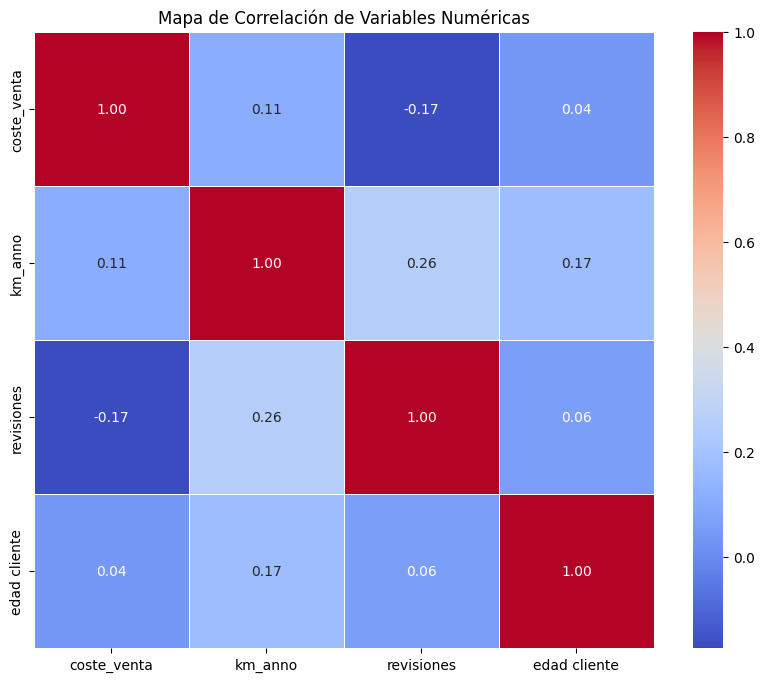

In [35]:
# Convertir nombres de columnas a minúsculas y eliminar espacios (opcional pero recomendable)
df.columns = df.columns.str.strip().str.lower()

# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar el mapa de correlación usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()
